Build a model which predicts sales based on the money spent on different platforms for marketing.

# Importing numpy and pandas packages 

In [27]:
import pandas as pd
import numpy as np

Importing Graph packages


In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

Storing Data Set in data variable

In [5]:
data=pd.read_csv("/content/advertising.csv")
data

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


Checking the distribution of data

In [6]:
data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


Checking data type of each column 

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


Checking null values

In [37]:
data.isnull().sum()/data.shape[0]

TV           0.0
Radio        0.0
Newspaper    0.0
Sales        0.0
dtype: float64

Outliers Detection/Analysis

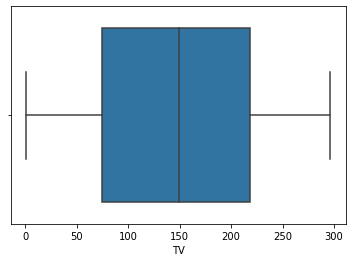

In [75]:
sns.boxplot(data['TV'])

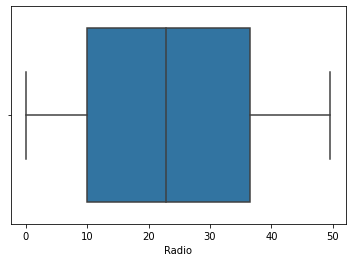

In [39]:
sns.boxplot(data['Radio'])

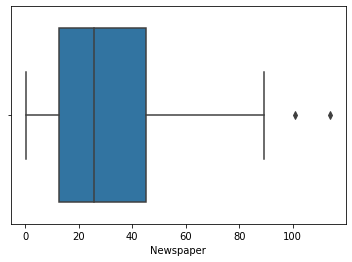

In [48]:
sns.boxplot(data['Newspaper'])


Analysing the sales of Tv,Newspaper,Radio

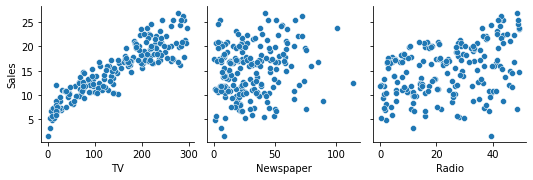

In [50]:
sns.pairplot(data, x_vars=['TV', 'Newspaper', 'Radio'], y_vars='Sales',  kind='scatter')
plt.show()

Checking the correlation for relation between the data

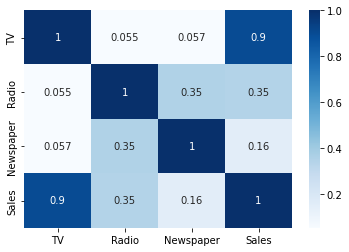

In [58]:

sns.heatmap(data.corr(), cmap="Blues", annot = True)


Linear Model Building




Training Variable(X):TV




Testing Variable(y) :Sales




splitting the data into training 70% and testing 30%

In [63]:
# X=data[['TV','Radio','Newspaper']]
X=data[['TV']]
y=data['Sales']
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

Fiting data into  linear Regregression Model with 70% of both training and testing Variable data 

In [64]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

Training and Testing Accuracy

In [66]:
Training_Acc=regressor.score(X_train,y_train)
Testing_Acc=regressor.score(X_test,y_test)

print("Training Accuracy:"+str(Training_Acc))
print("Testing Accuracy:"+str(Testing_Acc))


Training Accuracy:0.805941153711277
Testing Accuracy:0.8150168765722069


In [26]:
import warnings
warnings.filterwarnings('ignore')

regressor.predict([[220]])


array([19.31075609])

slope and intercept for line equation




Y = m(slope) * X(x_train) + c(intercept)

In [72]:
m=regressor.coef_
c=regressor.intercept_

Plotting the regressor line

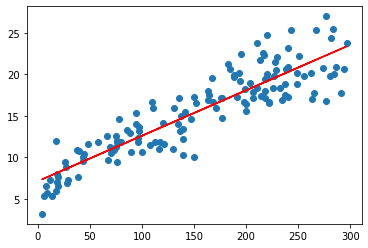

In [74]:
plt.scatter(X_train, y_train)
plt.plot(X_train,m*X_train+c, 'r')
plt.show()